In [3]:
import pandas as pd
dc_listings = pd.read_csv('airbnb_datesv2.csv', sep=';')
print(dc_listings.shape)
dc_listings

(268, 14)


,listings,url,guests,bedrooms,beds,bathrooms,room_type,price,host_name,reviews,stars,location,latitude,longitude
0,"""FUNTASTIC""Hostel in the Centre: Stage",https://www.airbnb.com.ro/rooms/37103158?locat...,10,1,1,1,Shared room in the apartment,81.0,George,18,4.67,"Brasov, Romania",4564293,2559111
1,"""ROOM 88"" Unique Experience Location and Light...",https://www.airbnb.com.ro/rooms/39272931?locat...,4,1,1,1,Entire home,215.0,Tudor,34,4.91,"Brasov, Romania",4563993,2559325
2,2 Spacious & Modern Apartament,https://www.airbnb.com.ro/rooms/39502159?locat...,4,2,2,1,Entire home,140.0,Costi,5,5.00,"Brasov, Romania",4567176,256098
3,4-5 apartament,https://www.airbnb.com.ro/rooms/30854683?locat...,4,2,2,1,Entire home,121.0,Nicu,0,0.00,"Brasov, Romania",4564067,256102754
4,5 Stars luxury 1,https://www.airbnb.com.ro/rooms/40392854?locat...,2,1,1,1,Entire home,131.0,Marius,12,4.83,"Brasov, Romania",4563885,2563439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,ZEN HOUSE centre of Bv,https://www.airbnb.com.ro/rooms/42726300?locat...,6,2,0,2,Entire home,439.0,Vartej,1,0.00,"Brasov, Romania",456394,2558782
264,Zen 1,https://www.airbnb.com.ro/rooms/41489971?locat...,4,1,2,1,Entire home,200.0,Alin,28,4.75,"Brasov, Romania",4563889,2558947
265,Zoom Room 102 Old Town Center,https://www.airbnb.com.ro/rooms/41105469?locat...,2,1,1,1,Private room in apartament,350.0,Ionut,5,5.00,"Brasov, Romania",4564219,2559279
266,Zoom Room 104 Old Town Center,https://www.airbnb.com.ro/rooms/41105712?locat...,2,1,1,1,Entire home,239.0,Ionut,1,0.00,"Brasov, Romania",4564219,2559279


In [4]:
import numpy as np
our_acc_value = 3
first_living_space_value = dc_listings.loc[0,'guests']
first_distance = np.abs(first_living_space_value - our_acc_value)
print(first_distance)

7


In [5]:
dc_listings['distance'] = np.abs(dc_listings.guests - our_acc_value)
dc_listings.distance.value_counts().sort_index()

0      26
1     191
2      16
3      21
4       3
5       6
7       2
11      1
13      2
Name: distance, dtype: int64

In [6]:
dc_listings = dc_listings.sample(frac=1,random_state=0)
dc_listings = dc_listings.sort_values('distance')
dc_listings.price.head()

254    160.0
93     165.0
99     185.0
95     165.0
253    115.0
Name: price, dtype: float64

In [7]:
dc_listings['price'] = dc_listings.price.astype(float)
mean_price = dc_listings.price.iloc[:5].mean()
mean_price

158.0

In [8]:
train_df = dc_listings.copy().iloc[:268]
test_df = dc_listings.copy().iloc[1:]

In [9]:
def predict_price(new_listing_value,feature_column):
    temp_df = train_df
    temp_df['distance'] = np.abs(dc_listings[feature_column] - new_listing_value)
    temp_df = temp_df.sort_values('distance')
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return(predicted_price)

In [10]:
test_df['predicted_price'] = test_df.guests.apply(predict_price,feature_column='guests')

In [11]:
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
rmse = mse ** (1/2)
rmse

88.6715179131311

In [12]:
for feature in ['guests']:
    test_df['predicted_price'] = test_df.guests.apply(predict_price,feature_column=feature)
    test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
    mse = test_df['squared_error'].mean()
    rmse = mse ** (1/2)
    print("RMSE for the {} column: {}".format(feature,rmse))

RMSE for the guests column: 88.6715179131311


In [13]:
for feature in ['price']:
    test_df['predicted_price'] = test_df.price.apply(predict_price,feature_column=feature)
    test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
    mse = test_df['squared_error'].mean()
    rmse = mse ** (1/2)
    print("RMSE for the {} column: {}".format(feature,rmse))

RMSE for the price column: 4.2583636550589


In [14]:
for feature in ['reviews']:
    test_df['predicted_price'] = test_df.reviews.apply(predict_price,feature_column=feature)
    test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
    mse = test_df['squared_error'].mean()
    rmse = mse ** (1/2)
    print("RMSE for the {} column: {}".format(feature,rmse))

RMSE for the reviews column: 94.61939225107373


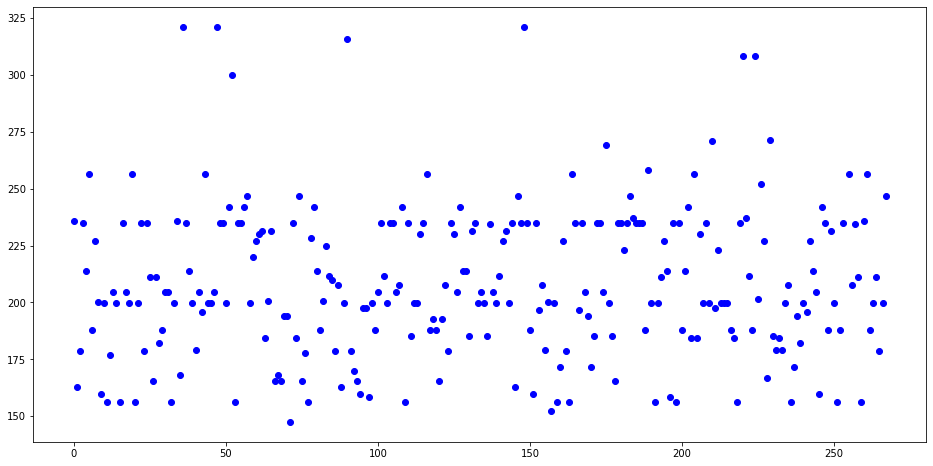

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(test_df['predicted_price'], 'bo')


In [16]:
normalized_listings = pd.read_csv('airbnb_datesv2.csv', sep=';')
print(normalized_listings.shape)
normalized_listings.head()

(268, 14)


,listings,url,guests,bedrooms,beds,bathrooms,room_type,price,host_name,reviews,stars,location,latitude,longitude
0,"""FUNTASTIC""Hostel in the Centre: Stage",https://www.airbnb.com.ro/rooms/37103158?locat...,10,1,1,1,Shared room in the apartment,81.0,George,18,4.67,"Brasov, Romania",4564293,2559111
1,"""ROOM 88"" Unique Experience Location and Light...",https://www.airbnb.com.ro/rooms/39272931?locat...,4,1,1,1,Entire home,215.0,Tudor,34,4.91,"Brasov, Romania",4563993,2559325
2,2 Spacious & Modern Apartament,https://www.airbnb.com.ro/rooms/39502159?locat...,4,2,2,1,Entire home,140.0,Costi,5,5.00,"Brasov, Romania",4567176,256098
3,4-5 apartament,https://www.airbnb.com.ro/rooms/30854683?locat...,4,2,2,1,Entire home,121.0,Nicu,0,0.00,"Brasov, Romania",4564067,256102754
4,5 Stars luxury 1,https://www.airbnb.com.ro/rooms/40392854?locat...,2,1,1,1,Entire home,131.0,Marius,12,4.83,"Brasov, Romania",4563885,2563439


In [19]:
normalized_listings = normalized_listings.sample(frac=1,random_state=0)
norm_train_df = normalized_listings.copy().iloc[0:268]
norm_test_df = normalized_listings.copy().iloc[1:]

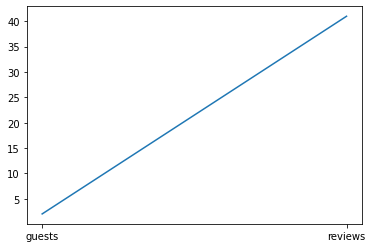

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(first_listing)

In [69]:
from scipy.spatial import distance
first_listing = normalized_listings.iloc[0][['guests', 'price']]
fifth_listing = normalized_listings.iloc[20][['guests', 'price']]
first_fifth_distance = distance.euclidean(first_listing, fifth_listing)
first_fifth_distance

256.03124809288414

In [70]:
round(first_fifth_distance)

256.0

In [71]:
from scipy.spatial import distance
first_listing = normalized_listings.iloc[0][['guests', 'reviews']]
fifth_listing = normalized_listings.iloc[20][['guests', 'reviews']]
first_fifth_distance = distance.euclidean(first_listing, fifth_listing)
first_fifth_distance


9.848857801796104

In [72]:
round(first_fifth_distance)

10.0

In [59]:
def predicted_price_multivariante(new_listing_value,feature_columns):
    temp_df = norm_train_df
    temp_df['distance'] = distance.cdist(temp_df[feature_columns],[new_listing_value[feature_columns]])
    temp_df = temp_df.sort_values('distance')
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return predicted_price_multivariante

    cols = ['guests', 'reviews']
    norm_test_df['predicted_price'] = norm_test_df[cols].apply(predicted_price_multivariante,feature_columns=cols)
    norm_test_df['squared_error'] = (norm_test_df['predicted_price'] - norm_test_df['price'])**(2)
    mse = norm_test_df['squared_error'].mean()
rmse = mse ** (1/2)
print(rmse)


94.61939225107373


In [73]:
round(rmse)

95

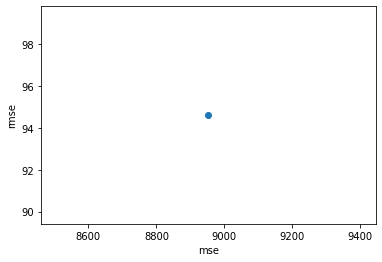

In [67]:
plt.scatter(mse, rmse)
plt.xlabel('mse')
plt.ylabel('rmse')
plt.show()

In [95]:
!pip install sklearn

In [104]:
!pip install scikit-learn

# Calculating MSE Using Scikit-Learn

In [116]:
from sklearn.metrics import mean_squared_error
two_features_mse = mean_squared_error(norm_test_df['price'], two_features_predictions)
two_features_rmse = two_features_mse ** (1/2)
print(two_features_rmse)

83.75648167206164


In [117]:
knn = KNeighborsRegressor(algorithm='brute')
cols = ['guests','reviews']
knn.fit(norm_train_df[cols], norm_train_df['price'])
four_features_predictions = knn.predict(norm_test_df[cols])
four_features_mse = mean_squared_error(norm_test_df['price'], four_features_predictions)
four_features_rmse = four_features_mse ** (1/2)
four_features_rmse

83.75648167206164